In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


In [2]:
data = pd.read_csv("fifa_players.csv")

In [3]:
features = [
    "age", "height_cm", "weight_kgs", "overall_rating", "potential",
    "wage_euro", "crossing", "finishing", "dribbling", "stamina", "strength", "vision"
]
target = "value_euro"

In [4]:
data_clean = data[features + [target]].dropna()
data_clean = data_clean[data_clean[target] > 0] 

In [5]:
data_clean['log_value'] = np.log1p(data_clean[target])

In [6]:
X = data_clean[features]
y = data_clean['log_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  
y_true = np.expm1(y_test) 

In [11]:
y_pred = model.predict(X_test)


In [13]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.12711127351524815
MAE: 0.08260927254633395
R²: 0.9748442662292593


Text(0.5, 1.0, 'Q-Q plot остатков')

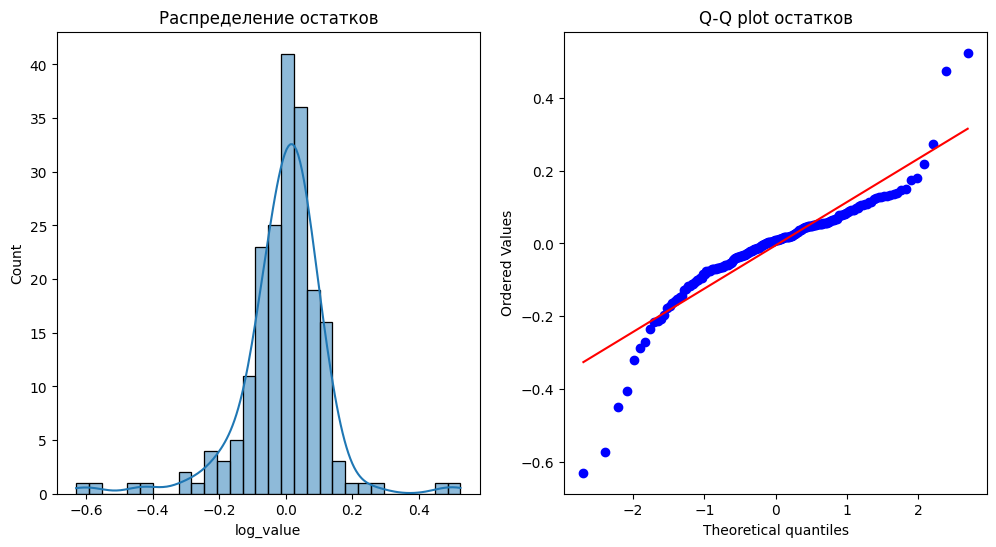

In [15]:
residuals = y_test - y_pred_log

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title("Q-Q plot остатков")

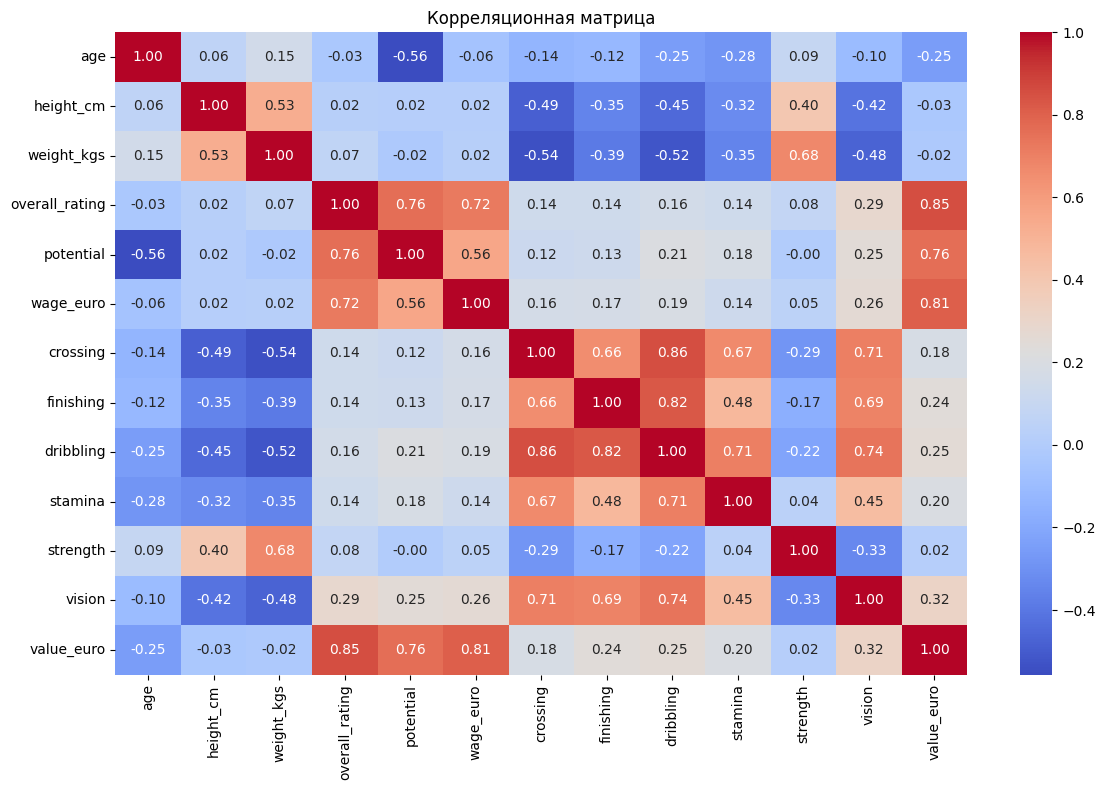

In [17]:
plt.figure(figsize=(12, 8))
corr_matrix = data_clean[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")

plt.tight_layout()
plt.show()